<a href="https://colab.research.google.com/github/asarm/ML_Projects/blob/main/embedding_word2vec_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/ml_projects

/content/drive/MyDrive/Colab Notebooks/udemy_ml


In [ ]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
import tensorflow as tf

bag of words and tfidf

*   sparse matrix representation
*   word order is not preserved or not important


embedding layers, word2vec and glove (global vectors for word rep.)


*   dense representation
*   word order is preserved or important

**Embedding Layer:** First hidden layer of the network

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
sentences = [
             'Awesome movie',
             'Not bad',
             'I loved this',
             'Not good like previous movie',
             'Awful',
             'Bad story',
             'This movie was the best movie I have ever watched'
]

In [ ]:
vocab_size = 5000

from tensorflow.keras.preprocessing.text import one_hot

onehot = [one_hot(words, vocab_size) for words in sentences ] 
print(onehot)

[[801, 4141], [2250, 544], [2592, 3613, 1445], [2250, 3586, 540, 1557, 4141], [4546], [544, 3526], [1445, 4141, 4128, 3841, 2848, 4141, 2592, 1309, 585, 1082]]


In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
max_length = len(max([word_tokenize(sentence) for sentence in sentences]))
embedded_docs = pad_sequences(onehot, padding="post",maxlen=max_length)

print(embedded_docs)

[[ 801 4141    0    0    0    0    0    0    0    0]
 [2250  544    0    0    0    0    0    0    0    0]
 [2592 3613 1445    0    0    0    0    0    0    0]
 [2250 3586  540 1557 4141    0    0    0    0    0]
 [4546    0    0    0    0    0    0    0    0    0]
 [ 544 3526    0    0    0    0    0    0    0    0]
 [1445 4141 4128 3841 2848 4141 2592 1309  585 1082]]


# Create Neural Network

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, input_length=max_length, output_dim=10))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 10)            50000     
Total params: 50,000
Trainable params: 50,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
preds = model.predict(embedded_docs)
model.predict(embedded_docs[4])

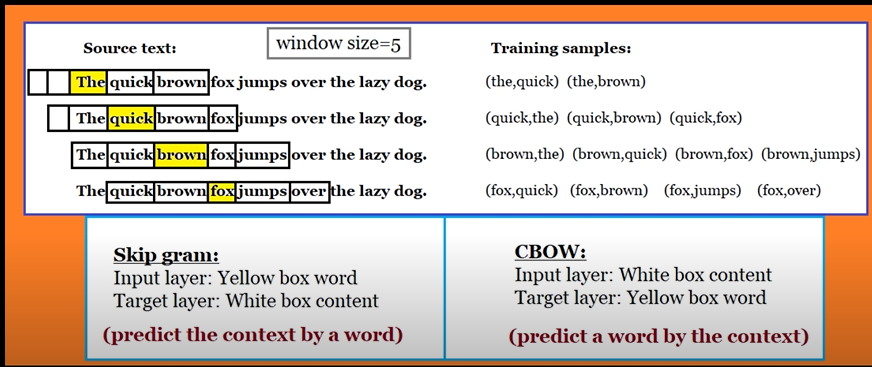

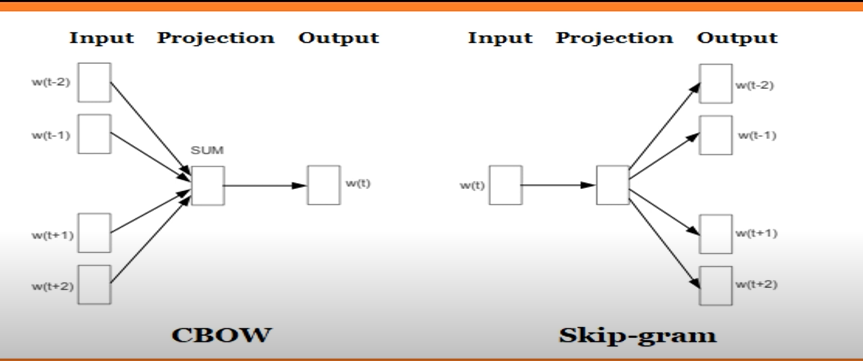

In [ ]:
!pip install gensim

In [ ]:
import nltk
import re
from gensim.models import Word2Vec
from nltk.corpus import stopwords 

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
paragraph = "The modern automobile is a complex technical system employing subsystems with specific design functions. Some of these consist of thousands of component parts that have evolved from breakthroughs in existing technology or from new technologies such as electronic computers, high-strength plastics, and new alloys of steel and nonferrous metals. Some subsystems have come about as a result of factors such as air pollution, safety legislation, and competition between manufacturers throughout the world. Passenger cars have emerged as the primary means of family transportation, with an estimated 1.4 billion in operation worldwide. About one-quarter of these are in the United States, where more than three trillion miles (almost five trillion kilometres) are traveled each year. In recent years, Americans have been offered hundreds of different models, about half of them from foreign manufacturers. To capitalize on their proprietary technological advances, manufacturers introduce new designs ever more frequently. With some 70 million new units built each year worldwide, manufacturers have been able to split the market into many very small segments that nonetheless remain profitable. New technical developments are recognized to be the key to successful competition. Research and development engineers and scientists have been employed by all automobile manufacturers and suppliers to improve the body, chassis, engine, drivetrain, control systems, safety systems, and emission-control systems. Vehicle design depends to a large extent on its intended use. Automobiles for off-road use must be durable, simple systems with high resistance to severe overloads and extremes in operating conditions. Conversely, products that are intended for high-speed, limited-access road systems require more passenger comfort options, increased engine performance, and optimized high-speed handling and vehicle stability. Stability depends principally on the distribution of weight between the front and rear wheels, the height of the centre of gravity and its position relative to the aerodynamic centre of pressure of the vehicle, suspension characteristics, and the selection of which wheels are used for propulsion. Weight distribution depends principally on the location and size of the engine. The common practice of front-mounted engines exploits the stability that is more readily achieved with this layout. The development of aluminum engines and new manufacturing processes has, however, made it possible to locate the engine at the rear without necessarily compromising stability. Automotive body designs are frequently categorized according to the number of doors, the arrangement of seats, and the roof structure. Automobile roofs are conventionally supported by pillars on each side of the body. Convertible models with retractable fabric tops rely on the pillar at the side of the windshield for upper body strength, as convertible mechanisms and glass areas are essentially nonstructural. Glass areas have been increased for improved visibility and for aesthetic reasons. Automotive bodies are generally formed out of sheet steel. The steel is alloyed with various elements to improve its ability to be formed into deeper depressions without wrinkling or tearing in manufacturing presses. Steel is used because of its general availability, low cost, and good workability. For certain applications, however, other materials, such as aluminum, fibreglass, and carbon-fibre reinforced plastic, are used because of their special properties. Polyamide, polyester, polystyrene, polypropylene, and ethylene plastics have been formulated for greater toughness, dent resistance, and resistance to brittle deformation. These materials are used for body panels. Tooling for plastic components generally costs less and requires less time to develop than that for steel components and therefore may be changed by designers at a lower cost."

In [ ]:
paragraph = paragraph.lower()
sentences = nltk.sent_tokenize(paragraph)
final_text = []

for i in range(len(sentences)):
  sentence = re.sub('[^a-zA-Z]', ' ', sentences[i])
  sentence = sentence.split()
  sentence = [word for word in sentence if word not in stopwords.words('english')]
  final_text.append(sentence)

print(final_text)
print(len(final_text))

[['modern', 'automobile', 'complex', 'technical', 'system', 'employing', 'subsystems', 'specific', 'design', 'functions'], ['consist', 'thousands', 'component', 'parts', 'evolved', 'breakthroughs', 'existing', 'technology', 'new', 'technologies', 'electronic', 'computers', 'high', 'strength', 'plastics', 'new', 'alloys', 'steel', 'nonferrous', 'metals'], ['subsystems', 'come', 'result', 'factors', 'air', 'pollution', 'safety', 'legislation', 'competition', 'manufacturers', 'throughout', 'world'], ['passenger', 'cars', 'emerged', 'primary', 'means', 'family', 'transportation', 'estimated', 'billion', 'operation', 'worldwide'], ['one', 'quarter', 'united', 'states', 'three', 'trillion', 'miles', 'almost', 'five', 'trillion', 'kilometres', 'traveled', 'year'], ['recent', 'years', 'americans', 'offered', 'hundreds', 'different', 'models', 'half', 'foreign', 'manufacturers'], ['capitalize', 'proprietary', 'technological', 'advances', 'manufacturers', 'introduce', 'new', 'designs', 'ever', '

In [ ]:
model = Word2Vec(final_text, min_count=3)
print(model)

Word2Vec(vocab=13, size=100, alpha=0.025)


In [ ]:
vocab = model.wv.vocab
print(vocab.keys())
print(len(vocab))

dict_keys(['automobile', 'new', 'high', 'steel', 'manufacturers', 'body', 'engine', 'systems', 'vehicle', 'depends', 'resistance', 'stability', 'used'])
13


In [ ]:
vector = model.wv['automobile']
print(vector)

In [ ]:
similar = model.wv.most_similar('vehicle')
print(similar)

[('automobile', 0.09443239122629166), ('systems', 0.07616490870714188), ('steel', 0.06883418560028076), ('depends', 0.0634114146232605), ('manufacturers', 0.04779035598039627), ('new', 0.03191591799259186), ('engine', 0.003365546464920044), ('high', -0.004626346752047539), ('body', -0.07751332223415375), ('stability', -0.07896050810813904)]


In [ ]:
model.wv.similarity(w1="automobile", w2="vehicle")

0.09445417